In [9]:
# Check your GPU
!nvidia-smi

Mon Apr  1 17:19:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        On  |   00000000:81:00.0 Off |                  N/A |
| 40%   32C    P8             17W /  350W |    4526MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Downloading Data

In [1]:
import os
import zipfile

# Install gdown (to be able to download files from Google Drive)
!pip install gdown

# Download dataset
os.makedirs('input', exist_ok=True)
path_to_dataset = "input/dataset.zip"

if not os.path.exists(path_to_dataset):
    !gdown 1Ifk07HeqxHfCCOCvb5oDF-cdxfkfsuq- -O input/dataset.zip
else:
    print(f"Already downloaded `{path_to_dataset}`")

# Unzip dataset into 'input' folder
with zipfile.ZipFile(path_to_dataset, 'r') as zip_ref:
    zip_ref.extractall('input/dataset')

# Remove zip file
os.remove(path_to_dataset)

# List input directory
%ls input/

print('Done')

Downloading...
From: https://drive.google.com/uc?id=1Ifk07HeqxHfCCOCvb5oDF-cdxfkfsuq-
To: /workspace/EveryDream2trainer/input/dataset.zip
100%|██████████████████████████████████████| 20.9M/20.9M [00:02<00:00, 7.57MB/s]
dataset/
Done


In [2]:
!wget https://raw.githubusercontent.com/learn2train/l2t-sd/main/notebooks/optimizer-photo.json

--2024-04-01 14:37:21--  https://raw.githubusercontent.com/learn2train/l2t-sd/main/notebooks/optimizer-photo.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039 (2.0K) [text/plain]
Saving to: ‘optimizer-photo.json’

optimizer-photo.jso 100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-04-01 14:37:21 (23.6 MB/s) - ‘optimizer-photo.json’ saved [2039/2039]



### Setup Wandb

In [3]:
wandb_token = "PUT-YOUR-W&B-API-KEY-HERE"
wandb_token = "3645dff2e3fa7a196b7d1f9c4fd8314def73f032"

### Inference before training

In [11]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("learn2train/stable-diffusion-v1-5")

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "a black and white photo of a woman wearing a floral crown and holding a bouquet of flowers in the style of Bella Kotak."

image = pipeline(prompt, num_inference_steps=30).images[0]

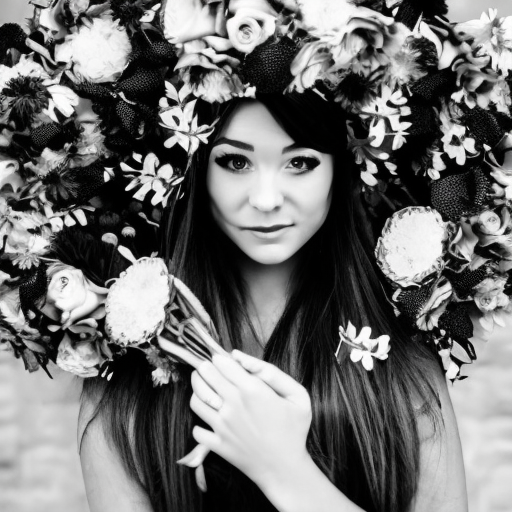

In [14]:
from IPython.display import display

display(image)

### Run training

In [4]:
# Get the wandb token
wandb_settings = ""
if wandb_token:
  !rm /root/.netrc
  !wandb login $wandb_token
  wandb_settings = "--wandb"

# Start the training 
%run train.py --resume_ckpt "learn2train/stable-diffusion-v1-5" \
$wandb_settings \
--project_name "sd1_kotak" \
--data_root "input" \
--max_epochs 60 \
--sample_steps 80 \
--batch_size 6 \
--save_every_n_epochs 20 \
--zero_frequency_noise_ratio 0.04 \
--cond_dropout 0.0 \
--optimizer_config optimizer-photo.json \
--save_ckpt_dir "output"

rm: cannot remove '/root/.netrc': No such file or directory
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

** Your branch 'main' is up to date with the remote
Loading training config from None.
Error on loading training config from None.
 logging to logs/sd1_kotak-20240401-144703/sd1_kotak-20240401-144703.log
 Args:
{'amp': True,
 'aspects': [[512, 512],
             [576, 448],
             [448, 576],
             [640, 384],
             [384, 640],
             [768, 320],
             [320, 768],
             [896, 256],
             [256, 896],
             [1024, 256],
             [256, 1024]],
 'attn_type': 'sdp',
 'batch_size': 6,
 'ckpt_every_n_minutes': 1000000000.0,
 'clip_grad_norm': None,
 'clip_skip': 0,
 'cond_dropout': 0.0,
 'config': None,
 'data_root': 'input',
 'disable_amp': False,
 'disable_textenc_training': False,
 'disable_unet_training': False,
 'ema_decay_rate': None,
 'ema_device': 'cpu',
 'ema_resume_model': None,
 'ema_sample_ema_model': False,
 'ema_sample_nonema_model': False,
 'ema_strength_target': None,
 'ema_update_interval': 500,
 'enable_zero_terminal_

model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/workspace/venv/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


 unet attention_head_dim: 8
Inferred yaml: v1-inference.yaml, attn: sd1, prediction_type: epsilon
* HuggingFace Downloaded model from learn2train/stable-diffusion-v1-5 to /root/.cache/huggingface/hub/models--learn2train--stable-diffusion-v1-5/snapshots/c65eab801b6c8d3407a1c6f89569d4465fc1f43f.
** Using attention yaml file: v1-inference.yaml, is_sd1_attn: True.
 * Using default (DDPM) noise scheduler for training: ddpm
* Using SDP attention *


wandb: Currently logged in as: taaha-s-bajwa. Use `wandb login --relogin` to force relogin


* DLMA resolution 512, buckets: [[512, 512], [576, 448], [448, 576], [640, 384], [384, 640], [768, 320], [320, 768], [896, 256], [256, 896], [1024, 256], [256, 1024]]
 Preloading images...


preloading: 100%|██████████| 109/109 [00:00<00:00, 3140.18it/s]

 * Found 109 files in 'input'
No plugins specified
 * DLMA initialized with 109 images.
 ** Dataset 'train': 21 batches, num_images: 126, batch_size: 6

 raw optimizer_config:
{'apply_grad_scaler_step_tweaks': True,
 'base': {'betas': [0.9, 0.999],
          'epsilon': 1e-08,
          'lr': 1e-06,
          'lr_decay_steps': None,
          'lr_scheduler': 'constant',
          'lr_warmup_steps': None,
          'optimizer': 'adamw8bit',
          'weight_decay': 0.01},
 'text_encoder_freezing': {'unfreeze_last_n_layers': 6},
 'text_encoder_overrides': {'betas': None,
                            'epsilon': None,
                            'lr': 5e-07,
                            'lr_decay_steps': None,
                            'lr_scheduler': 'cosine',
                            'lr_warmup_steps': None,
                            'optimizer': None,
                            'weight_decay': None}}
 Final unet optimizer config:
{'betas': [0.9, 0.999],
 'epsilon': 1e-08,
 'lr': 1

    lr: 5e-07, betas: [0.9, 0.999], epsilon: 1e-08, weight_decay: 0.01 *
 * unet optimizer: AdamW8bit (686 parameters) *
    lr: 1e-06, betas: [0.9, 0.999], epsilon: 1e-08, weight_decay: 0.01 *
 Grad scaler enabled: True (amp mode)
 * SampleGenerator initialized with 3 prompts, generating samples every 80 training steps, using scheduler 'ddim' with 30 inference steps
 ** Welcome to EveryDream trainer 2.0!**
 (C) 2022-2023 Victor C Hall  This program is licensed under AGPL 3.0 https://www.gnu.org/licenses/agpl-3.0.en.html

** Trainer Starting **
 Pretraining GPU Memory: 4606 / 24576 MB
 saving ckpts every 1000000000.0 minutes
 saving ckpts every 20 epochs
 unet device: cuda:0, precision: torch.float32, training: True
 text_encoder device: cuda:0, precision: torch.float32, training: True
 vae device: cuda:0, precision: torch.float16, training: False
 scheduler: <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>
 Project name: sd1_kotak
 grad_accum: 1
 batch_size: 6
 epoch_len: 

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:79 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:159 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:239 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:319 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:399 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

 Saving model, 20 epochs at step 420
 * Saving diffusers model to logs/sd1_kotak-20240401-144703/ckpts/sd1_kotak-ep20-gs00420
 * Saving SD model to output/sd1_kotak-ep20-gs00420.safetensors


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:479 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:559 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:639 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:719 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:799 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 Saving model, 20 epochs at step 840
 * Saving diffusers model to logs/sd1_kotak-20240401-144703/ckpts/sd1_kotak-ep40-gs00840
 * Saving SD model to output/sd1_kotak-ep40-gs00840.safetensors


  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:879 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:959 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:1039 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:1119 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Generating samples at gs:1199 for 3 prompts


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

 * Saving diffusers model to logs/sd1_kotak-20240401-144703/ckpts/last-sd1_kotak-ep60-gs01260
 * Saving SD model to output/last-sd1_kotak-ep60-gs01260.safetensors
Training complete
Total training time took 22.36 minutes, total steps: 1260
Average epoch time: 0.37 minutes
 ***************************
 **** Finished training ****
 ***************************


###  Pushing Model to huggingface

In [5]:
# Log in to Hugging Face

from huggingface_hub import notebook_login, hf_hub_download
import os
notebook_login()

In [7]:
# Run this cell after reading the instructions of the cell above 

import glob
import os
from huggingface_hub import HfApi
from ipywidgets import *
all_ckpts = [f for f in glob.glob("output/*.safetensors")]
  
ckpt_picker = SelectMultiple(options=all_ckpts, layout=Layout(width="600px")) 
hfuser = Text(placeholder='darthPanda')
hfrepo = Text(placeholder='sd_bella_1')
api = HfApi()
upload_btn = Button(description='Upload')
out = Output()
def upload_ckpts(_):
    repo_id=f"{hfuser.value or hfuser.placeholder}/{hfrepo.value or hfrepo.placeholder}"
    with out:
        if ckpt_picker is None or len(ckpt_picker.value) < 1:
            print("Nothing selected for upload, make sure to click one of the ckpt files in the list, or, you have no ckpt files in the current directory.")
        for ckpt in ckpt_picker.value:
            print(f"Uploading to HF: huggingface.co/{repo_id}/{ckpt}")
            response = api.upload_file(
                path_or_fileobj=ckpt,
                path_in_repo=ckpt,
                repo_id=repo_id,
                repo_type=None,
                create_pr=1,
            )
            display(response)
        print("DONE")
upload_btn.on_click(upload_ckpts)
box = VBox([ckpt_picker, HBox([hfuser, hfrepo]), upload_btn, out])
display(box)

### Inference after Training

In [8]:
from ipywidgets import *
from IPython.display import display, clear_output
import os
import gc
import random
import torch
import inspect

from torch import autocast
from diffusers import StableDiffusionPipeline, AutoencoderKL, UNet2DConditionModel, DDIMScheduler, DDPMScheduler, PNDMScheduler, EulerAncestralDiscreteScheduler
from transformers import CLIPTextModel, CLIPTokenizer

checkpoints_ts = []
for root, dirs, files in os.walk("."):
        for file in files:
            if os.path.basename(file) == "model_index.json":
                ts = os.path.getmtime(os.path.join(root,file))
                ckpt = root
                checkpoints_ts.append((ts, root))
checkpoints = [ckpt for (_, ckpt) in sorted(checkpoints_ts, reverse=True)]
full_width = Layout(width='600px')
half_width = Layout(width='300px')
checkpoint = Dropdown(options=checkpoints, description='Checkpoint:', layout=full_width)
prompt = Textarea(value='a photo of ', description='Prompt:', layout=full_width)
height = IntSlider(value=512, min=256, max=768, step=32, description='Height:', layout=half_width)
width = IntSlider(value=512, min=256, max=768, step=32, description='Width:', layout=half_width)
cfg = FloatSlider(value=7.0, min=0.0, max=14.0, step=0.2, description='CFG Scale:', layout=half_width)
steps = IntSlider(value=30, min=10, max=100, description='Steps:', layout=half_width)
seed = IntText(value=-1, description='Seed:', layout=half_width)
generate_btn = Button(description='Generate', layout=full_width)
out = Output()
def generate(_):
    with out:
        clear_output()
        display(f"Loading model {checkpoint.value}")
        actual_seed = seed.value if seed.value != -1 else random.randint(0, 2**30)
        text_encoder = CLIPTextModel.from_pretrained(checkpoint.value, subfolder="text_encoder")
        vae = AutoencoderKL.from_pretrained(checkpoint.value, subfolder="vae")
        unet = UNet2DConditionModel.from_pretrained(checkpoint.value, subfolder="unet")
        tokenizer = CLIPTokenizer.from_pretrained(checkpoint.value, subfolder="tokenizer", use_fast=False)
        scheduler = DDIMScheduler.from_pretrained(checkpoint.value, subfolder="scheduler")
        text_encoder.eval()
        vae.eval()
        unet.eval()
        text_encoder.to("cuda")
        vae.to("cuda")
        unet.to("cuda")
        pipe = StableDiffusionPipeline(
            vae=vae,
            text_encoder=text_encoder,
            tokenizer=tokenizer,
            unet=unet,
            scheduler=scheduler,
            safety_checker=None, # save vram
            requires_safety_checker=None, # avoid nag
            feature_extractor=None, # must be none of no safety checker
        )
        pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
        
        print(inspect.cleandoc(f"""
              Prompt: {prompt.value}
              Resolution: {width.value}x{height.value}
              CFG: {cfg.value}
              Steps: {steps.value}
              Seed: {actual_seed}
              """))
        with autocast("cuda"):
            image = pipe(prompt.value, 
                generator=torch.Generator("cuda").manual_seed(actual_seed),
                num_inference_steps=steps.value, 
                guidance_scale=cfg.value,
                width=width.value,
                height=height.value
            ).images[0]
        del pipe
        gc.collect()
        with torch.cuda.device("cuda"):
            torch.cuda.empty_cache()
            torch.cuda.ipc_collect()
        display(image)
            
generate_btn.on_click(generate)
box = VBox(
    children=[
        checkpoint, prompt, 
        HBox([VBox([width, height]), VBox([steps, cfg])]), 
        seed, 
        generate_btn, 
        out]
)

display(box)